In [23]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from yahoofinancials import YahooFinancials
from yahooquery import Ticker

In [12]:
print('Ratios presented')
print('Leverage')
print(' :Debt to Assets')
print(' :Debt to Equity')
print(' :Asset to Equity')
print('Profitability')
print(' :Gross Profit Margin')
print(' :Return on Equity')
print(' :Return on Assets')
print(' :Operating Profit Margin')
print('Coverage')
print(' :Interest Coverage')
print(' :Cash Coverage')
print('Liquidity')
print(' :Current Ratio')
print(' :Cash Ratio')
print(' :Working Capital')

Ratios presented
Leverage
 :Debt to Assets
 :Debt to Equity
 :Asset to Equity
Profitability
 :Gross Profit Margin
 :Return on Equity
 :Return on Assets
 :Operating Profit Margin
Coverage
 :Interest Coverage
 :Cash Coverage
Liquidity
 :Current Ratio
 :Cash Ratio
 :Working Capital


In [157]:
#Ticker to analyze
ticker = Ticker('aapl')
#get balance sheet for ticker
ticker_Bal = ticker.balance_sheet()
#Get cash flow for ticker
ticker_cash = ticker.cash_flow()
#Get income statement for ticker
ticker_income = ticker.income_statement()
#Print the col(series) for the balance sheet
for col in ticker_Bal.columns:
     print(col)

asOfDate
periodType
currencyCode
AccountsPayable
AccountsReceivable
AccumulatedDepreciation
AllowanceForDoubtfulAccountsReceivable
AvailableForSaleSecurities
CapitalStock
CashAndCashEquivalents
CashCashEquivalentsAndShortTermInvestments
CashEquivalents
CashFinancial
CommercialPaper
CommonStock
CommonStockEquity
CurrentAccruedExpenses
CurrentAssets
CurrentDebt
CurrentDebtAndCapitalLeaseObligation
CurrentDeferredLiabilities
CurrentDeferredRevenue
CurrentLiabilities
GainsLossesNotAffectingRetainedEarnings
Goodwill
GoodwillAndOtherIntangibleAssets
GrossAccountsReceivable
GrossPPE
Inventory
InvestedCapital
InvestmentinFinancialAssets
InvestmentsAndAdvances
LandAndImprovements
Leases
LongTermDebt
LongTermDebtAndCapitalLeaseObligation
MachineryFurnitureEquipment
NetDebt
NetPPE
NetTangibleAssets
NonCurrentDeferredLiabilities
NonCurrentDeferredRevenue
NonCurrentDeferredTaxesLiabilities
OrdinarySharesNumber
OtherCurrentAssets
OtherCurrentBorrowings
OtherCurrentLiabilities
OtherIntangibleAssets
O

In [5]:
#Print the col(series) for the cash flow
for col in ticker_cash.columns:
     print(col)

asOfDate
periodType
currencyCode
BeginningCashPosition
CapitalExpenditure
CashDividendsPaid
CashFlowFromContinuingFinancingActivities
CashFlowFromContinuingInvestingActivities
CashFlowFromContinuingOperatingActivities
ChangeInAccountPayable
ChangeInCashSupplementalAsReported
ChangeInInventory
ChangeInOtherCurrentAssets
ChangeInOtherCurrentLiabilities
ChangeInOtherWorkingCapital
ChangeInPayable
ChangeInPayablesAndAccruedExpense
ChangeInReceivables
ChangeInWorkingCapital
ChangesInAccountReceivables
ChangesInCash
CommonStockDividendPaid
CommonStockIssuance
CommonStockPayments
DeferredIncomeTax
DeferredTax
DepreciationAmortizationDepletion
DepreciationAndAmortization
EndCashPosition
FinancingCashFlow
FreeCashFlow
IncomeTaxPaidSupplementalData
InterestPaidSupplementalData
InvestingCashFlow
IssuanceOfCapitalStock
IssuanceOfDebt
LongTermDebtIssuance
LongTermDebtPayments
NetBusinessPurchaseAndSale
NetCommonStockIssuance
NetIncome
NetIncomeFromContinuingOperations
NetIntangiblesPurchaseAndSale


In [4]:
#Print the col(series) for the income statement
for col in ticker_income.columns:
     print(col)

asOfDate
periodType
currencyCode
BasicAverageShares
BasicEPS
CostOfRevenue
DilutedAverageShares
DilutedEPS
DilutedNIAvailtoComStockholders
EBIT
EBITDA
GrossProfit
InterestExpense
InterestExpenseNonOperating
InterestIncome
InterestIncomeNonOperating
NetIncome
NetIncomeCommonStockholders
NetIncomeContinuousOperations
NetIncomeFromContinuingAndDiscontinuedOperation
NetIncomeFromContinuingOperationNetMinorityInterest
NetIncomeIncludingNoncontrollingInterests
NetInterestIncome
NetNonOperatingInterestIncomeExpense
NormalizedEBITDA
NormalizedIncome
OperatingExpense
OperatingIncome
OperatingRevenue
OtherIncomeExpense
OtherNonOperatingIncomeExpenses
PretaxIncome
ReconciledCostOfRevenue
ReconciledDepreciation
ResearchAndDevelopment
SellingGeneralAndAdministration
TaxEffectOfUnusualItems
TaxProvision
TaxRateForCalcs
TotalExpenses
TotalOperatingIncomeAsReported
TotalRevenue


In [9]:
#Create a DF of the financial statements
df = [ticker_Bal,ticker_cash,ticker_income]
#Concatenate the DF together easier for pulling series for the Ratios
df_joined = pd.concat(df)

In [10]:
#Print the series of the joined DF
for col in df_joined.columns:
     print(col)

asOfDate
periodType
currencyCode
AccountsPayable
AccountsReceivable
AccumulatedDepreciation
AllowanceForDoubtfulAccountsReceivable
AvailableForSaleSecurities
CapitalStock
CashAndCashEquivalents
CashCashEquivalentsAndShortTermInvestments
CashEquivalents
CashFinancial
CommercialPaper
CommonStock
CommonStockEquity
CurrentAccruedExpenses
CurrentAssets
CurrentDebt
CurrentDebtAndCapitalLeaseObligation
CurrentDeferredLiabilities
CurrentDeferredRevenue
CurrentLiabilities
GainsLossesNotAffectingRetainedEarnings
Goodwill
GoodwillAndOtherIntangibleAssets
GrossAccountsReceivable
GrossPPE
Inventory
InvestedCapital
InvestmentinFinancialAssets
InvestmentsAndAdvances
LandAndImprovements
Leases
LongTermDebt
LongTermDebtAndCapitalLeaseObligation
MachineryFurnitureEquipment
NetDebt
NetPPE
NetTangibleAssets
NonCurrentDeferredLiabilities
NonCurrentDeferredRevenue
NonCurrentDeferredTaxesLiabilities
OrdinarySharesNumber
OtherCurrentAssets
OtherCurrentBorrowings
OtherCurrentLiabilities
OtherIntangibleAssets
O

In [21]:
print('Leverage Ratios')
#It can be interpreted as the proportion of a company’s assets that are financed by debt as a percentage.
df_joined['Debt/Assets'] = (df_joined['TotalDebt'] / df_joined['TotalAssets'])*100
# indicates how much debt is used to carry a firm's assets.
df_joined['Debt/Equity'] = (df_joined['TotalDebt'] / df_joined['StockholdersEquity']) #It shows the ratio between the total assets of the company to the amount on which equity holders have a claim.
df_joined['Asset/Equity'] = (df_joined['TotalAssets'] / df_joined['StockholdersEquity'])
print(df_joined[['asOfDate','Debt/Assets','Debt/Equity','Asset/Equity']].head(4))

Leverage Ratios
         asOfDate  Debt/Assets  Debt/Equity  Asset/Equity
symbol                                                   
aapl   2017-09-30    30.821781     0.862981      2.799906
aapl   2018-09-30    31.303028     1.068467      3.413301
aapl   2019-09-30    31.917841     1.194048      3.741004
aapl   2020-09-30    34.714469     1.720810      4.957039


In [44]:
print('Profitability')
#for the Series StockholdersEquity take the mean 
avg_share_equity = df_joined['StockholdersEquity'].mean()
#Gross profit margin is a metric analysts use to assess a company's financial health by calculating the amount of money left over from product sales after subtracting the cost of goods sold (COGS) as a percentage
df_joined['Gross_Margin'] = ((df_joined['TotalRevenue'] - df_joined['CostOfRevenue']) / df_joined['TotalRevenue'])*100
#Return on equity (ROE) measures how the profitability of a corporation in relation to stockholders’ equity
df_joined['ROE'] = (df_joined['NetIncome'] / avg_share_equity)*100
#measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.
df_joined['Operating_Margin'] = (df_joined['EBIT'] / df_joined['TotalRevenue'])*100
#Print the results
print(df_joined[['asOfDate','Gross_Margin','ROE','Operating_Margin']].tail(6))

Profitability
         asOfDate  Gross_Margin        ROE  Operating_Margin
symbol                                                      
aapl   2017-09-30     38.469860  48.713796         28.971270
aapl   2018-09-30     38.343719  59.977684         28.668838
aapl   2019-09-30     37.817768  55.670607         26.641017
aapl   2020-06-30     38.187813  58.862378         26.059586
aapl   2020-09-30     38.233248  57.841777         25.486403
aapl   2020-12-31     38.780492  64.409691         26.340966


In [50]:
print('Coverage Ratios')
df_joined['Interest_coverage'] = (df_joined['EBIT'] / df_joined['InterestExpense'])
print(df_joined[['asOfDate','Interest_coverage']].tail(6))

Coverage Ratios
         asOfDate  Interest_coverage
symbol                              
aapl   2017-09-30          28.588894
aapl   2018-09-30          23.500926
aapl   2019-09-30          19.382830
aapl   2020-06-30          23.406363
aapl   2020-09-30          24.352245
aapl   2020-12-31          28.421864


In [55]:
print('Liquidity Ratios')
df_joined['Current_ratio'] = df_joined['CurrentAssets'] / df_joined['CurrentLiabilities']
df_joined['Cash_ratio'] = df_joined['CashAndCashEquivalents'] / df_joined['CurrentLiabilities'] * 100
print(df_joined[['asOfDate','Current_ratio','Cash_ratio']].head(4))

Liquidity Ratios
         asOfDate  Current_ratio  Cash_ratio
symbol                                      
aapl   2017-09-30       1.276063   20.125181
aapl   2018-09-30       1.123843   22.173258
aapl   2019-09-30       1.540126   46.202160
aapl   2020-09-30       1.363604   36.071049


In [135]:
#ROA breakdown
ROA = ticker_income['NetIncome'] / ticker_Bal['TotalAssets']
#ROA_dict = {'ROA': ROA, 'asOfDate' : ticker_income['asOfDate'] }
print(ROA)
#Result = pd.concat(ROA_dict)
#print(ticker_income['asOfDate'])
#ticker_income['ROA'] = (ticker_income['NetIncome'] / ticker_Bal['TotalAssets'] )
#print(ticker_income[['asOfDate','ROA']])

symbol
aapl    0.128826
aapl    0.132206
aapl    0.142832
aapl    0.149283
aapl    0.158614
aapl    0.162775
aapl    0.175859
aapl    0.183801
aapl    0.147224
aapl    0.151086
aapl    0.163230
aapl    0.170602
aapl    0.155665
aapl    0.159748
aapl    0.172589
aapl    0.180383
aapl    0.152966
aapl    0.156979
aapl    0.169596
aapl    0.177256
aapl    0.170335
aapl    0.174803
aapl    0.188854
aapl    0.197383
dtype: float64


In [152]:
#Cash_Coverage
ticker_income['Cash_coverage'] = (ticker_income['EBIT'] + ticker_income['ReconciledDepreciation'])/ ticker_income['InterestExpense']
print(ticker_income[['asOfDate','Cash_coverage']])

         asOfDate  Cash_coverage
symbol                          
aapl   2017-09-30      32.961257
aapl   2018-09-30      26.866049
aapl   2019-09-30      22.891499
aapl   2020-06-30      27.188914
aapl   2020-09-30      28.200487
aapl   2020-12-31      32.422597


In [158]:
ticker_Bal['Asset_coverage'] = (ticker_Bal['TotalAssets'] - ticker_Bal['CurrentLiabilities'] )/ ticker_Bal['TotalDebt']
print(ticker_Bal[['asOfDate','Asset_coverage']])

         asOfDate  Asset_coverage
symbol                           
aapl   2017-09-30        2.372969
aapl   2018-09-30        2.173764
aapl   2019-09-30        2.154599
aapl   2020-09-30        1.943292


Text(0, 0.5, 'Debt to Assets')

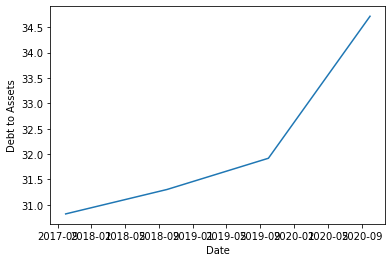

In [141]:
plt.plot(df_joined['asOfDate'],df_joined['Debt/Assets'])
plt.xlabel('Date')
plt.ylabel('Debt to Assets')

Text(0, 0.5, 'Debt to Equity')

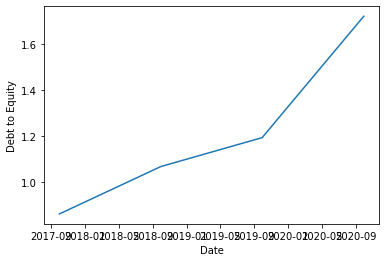

In [143]:
plt.plot(df_joined['asOfDate'],df_joined['Debt/Equity'])
plt.xlabel('Date')
plt.ylabel('Debt to Equity')

Text(0, 0.5, 'Asset to Equity')

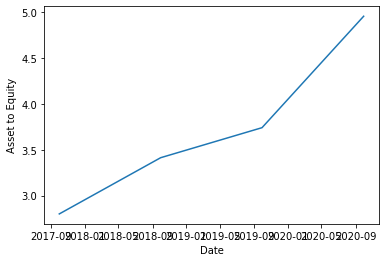

In [144]:
plt.plot(df_joined['asOfDate'],df_joined['Asset/Equity'])
plt.xlabel('Date')
plt.ylabel('Asset to Equity')

Text(0, 0.5, 'Gross Margin')

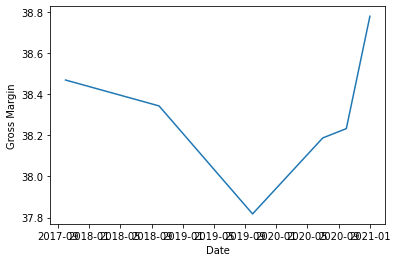

In [145]:
plt.plot(df_joined['asOfDate'],df_joined['Gross_Margin'])
plt.xlabel('Date')
plt.ylabel('Gross Margin')

Text(0, 0.5, 'Return on Equity')

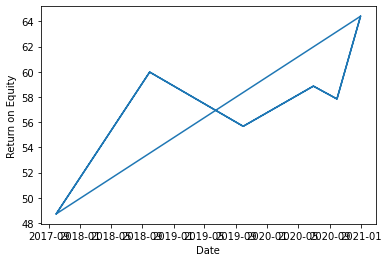

In [148]:
plt.plot(df_joined['asOfDate'],df_joined['ROE'])
plt.xlabel('Date')
plt.ylabel('Return on Equity')
#line is avg shareholder equity

Text(0, 0.5, 'Operating profit margin')

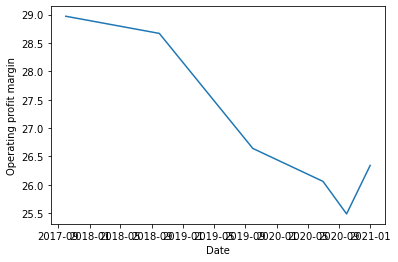

In [149]:
plt.plot(df_joined['asOfDate'], df_joined['Operating_Margin'])
plt.xlabel('Date')
plt.ylabel('Operating profit margin')

Text(0, 0.5, 'Interest Coverage')

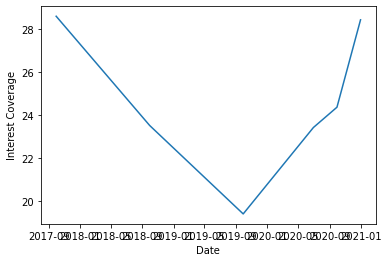

In [150]:
plt.plot(df_joined['asOfDate'],df_joined['Interest_coverage'])
plt.xlabel('Date')
plt.ylabel('Interest Coverage')

Text(0, 0.5, 'Cash Coverage')

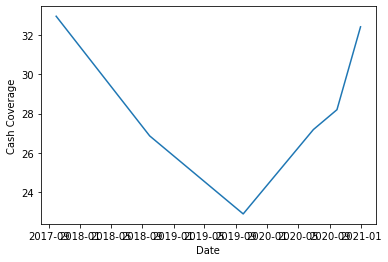

In [153]:
plt.plot(ticker_income['asOfDate'],ticker_income['Cash_coverage'])
plt.xlabel('Date')
plt.ylabel('Cash Coverage')

Text(0, 0.5, 'Asset Coverage')

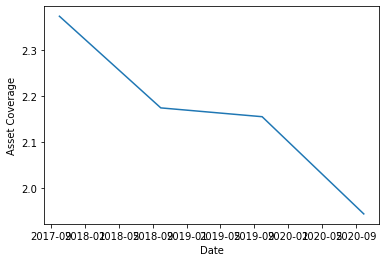

In [160]:
plt.plot(ticker_Bal['asOfDate'],ticker_Bal['Asset_coverage'])
plt.xlabel('Date')
plt.ylabel('Asset Coverage')

Text(0, 0.5, 'Cash_Ratio')

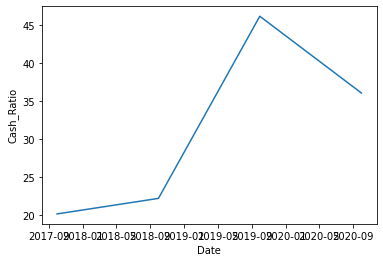

In [139]:
plt.plot(df_joined['asOfDate'],df_joined['Cash_ratio'])
plt.xlabel('Date')
plt.ylabel('Cash_Ratio')